# Daten einlesen und analysieren mit Pandas
In diesem Notebook geht es um das Einlesen und Analysieren von Daten mit der Python-Bibliothek [*Pandas*](https://pandas.pydata.org/docs/index.html).

## Installation

- Terminal: `pip install pandas` oder `conda install pandas`.
- Jupyter notebook: `!pip install pandas` oder `!conda install pandas`. 


## Import Statement
Wie bei anderen Python-Bibliotheken auch, müssen wir *Pandas* vor der Nutzung erst importieren. Es ist Konvention dabei *Pandas* als `pd` abzukürzen. 

In [ ]:
import pandas as pd


## DataFrames
Die [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) ist ein zweidimensionaler Datentyp in *Pandas* und dient zur Verarbeitung von tabellarischen Daten. Es ist Konvention Variablen die DataFarames referenzieren als `df` zu bezeichnen. 
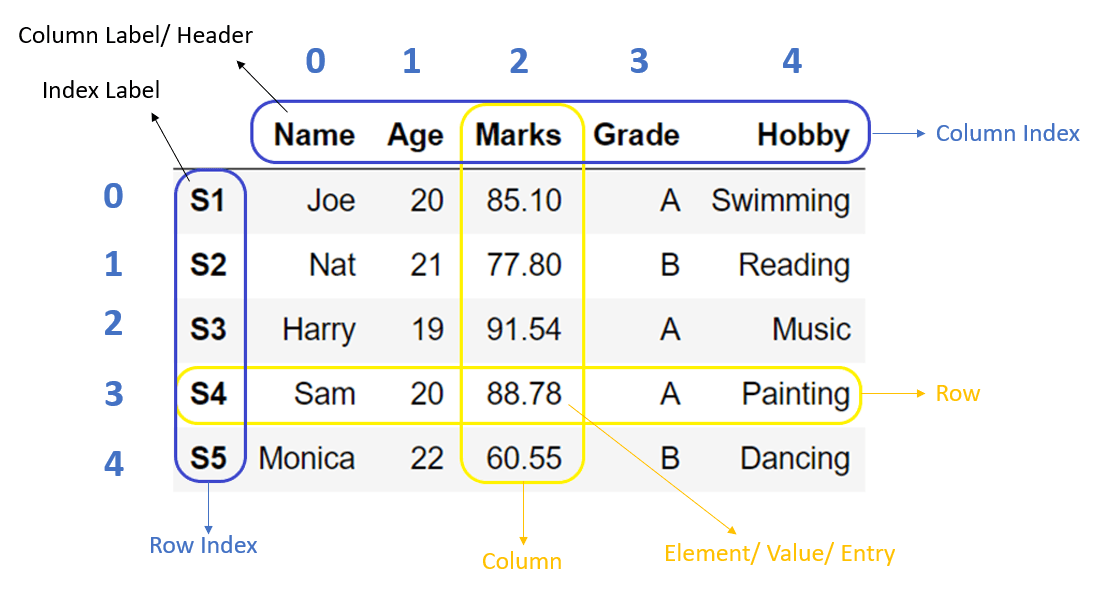
Quelle: https://pynative.com/python-pandas-dataframe/

### Wie erstellt man DataFrames? 
#### Manuelle Erstellung
Hier gibt es verschiedene Möglichkeiten, allerdings ist kann ein Python-Dictionary direkt die Spaltennamen und Werte festgelegt werden. Jeder Schlüssel entspricht hierbei dem Spaltennamen und die jeweiligen Werte den Listen der Schlüssel. 

In [ ]:
# manuelle Erstellung aus einem Dictionary

adict = {'col1': [1, 2, 3], 'col2': [2, 4, 6], 'col3': [3, 4, 5]}

df = pd.DataFrame(adict)

# DataFrame zeigen
df

#### Einlesen einer Excel-Datei
In der Praxis werden DataFrames meist durch das einlesen von Daten aus externen Formaten erzeugt, wie bspw. Excel oder CSV-Dateien.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# einlesen des Titanic Beispieldatensatzes 
df = sns.load_dataset("titanic")


In [ ]:
# die obersten 5
df.head()


In [ ]:
df.info()


### Descriptive Statistik

In [ ]:
# Arithmetisches Mittel der Spalte "age"
df.age.mean()


In [ ]:
# Standardabweichung der Spalte "age"
df.age.std()


In [ ]:
# alles!
df.describe()


## Selektion von Daten aus DataFrames
### Spalten extrahieren
Wenn nur eine Spalte extrahiert wird, entspricht der Datentyp einer [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html?highlight=series#pandas.Series). Diese hat teilweise andere Funktionen und nicht alle Funktionen, welche die DataFrame hat.

In [ ]:
df['age']

### Einzelne Zellen extrahieren
Eine Möglichkeit ist, dies mit dem Index der Dimension zu tun, bspw: "Gib mir die Daten der zweiten Spalte und der dritten Zeile". Dies funktioniert mit der Funktion `iloc`.
<div class="alert alert-info">
<b>Achtung!</b> Wie in Python üblich, started die Indizierung bei 0. Das heißt: die erste Zeile und Spalte wird jeweils mit 0 extrahiert und nicht mit 1. 1 extrahiert die zweite Spalte usw.
</div>

In [ ]:
# Zeilen mit Index 4 bis Index 9 und nur die Spalten Tax_amount und Avilability
df.iloc[4:10, 4:6]

Es können auch gezielt Daten aus Zellen extrahiert werden mit Angabe der Index- und Spaltennamen.

In [ ]:
# zeige mir Zeilen mit Index 10-20 und Spalten age und fare
df.loc[10:20,['age', 'fare']]

## Gruppierungen
Die Gruppierungen in *Pandas* sind vergleichbar mit dem `GROUP BY` in SQL.
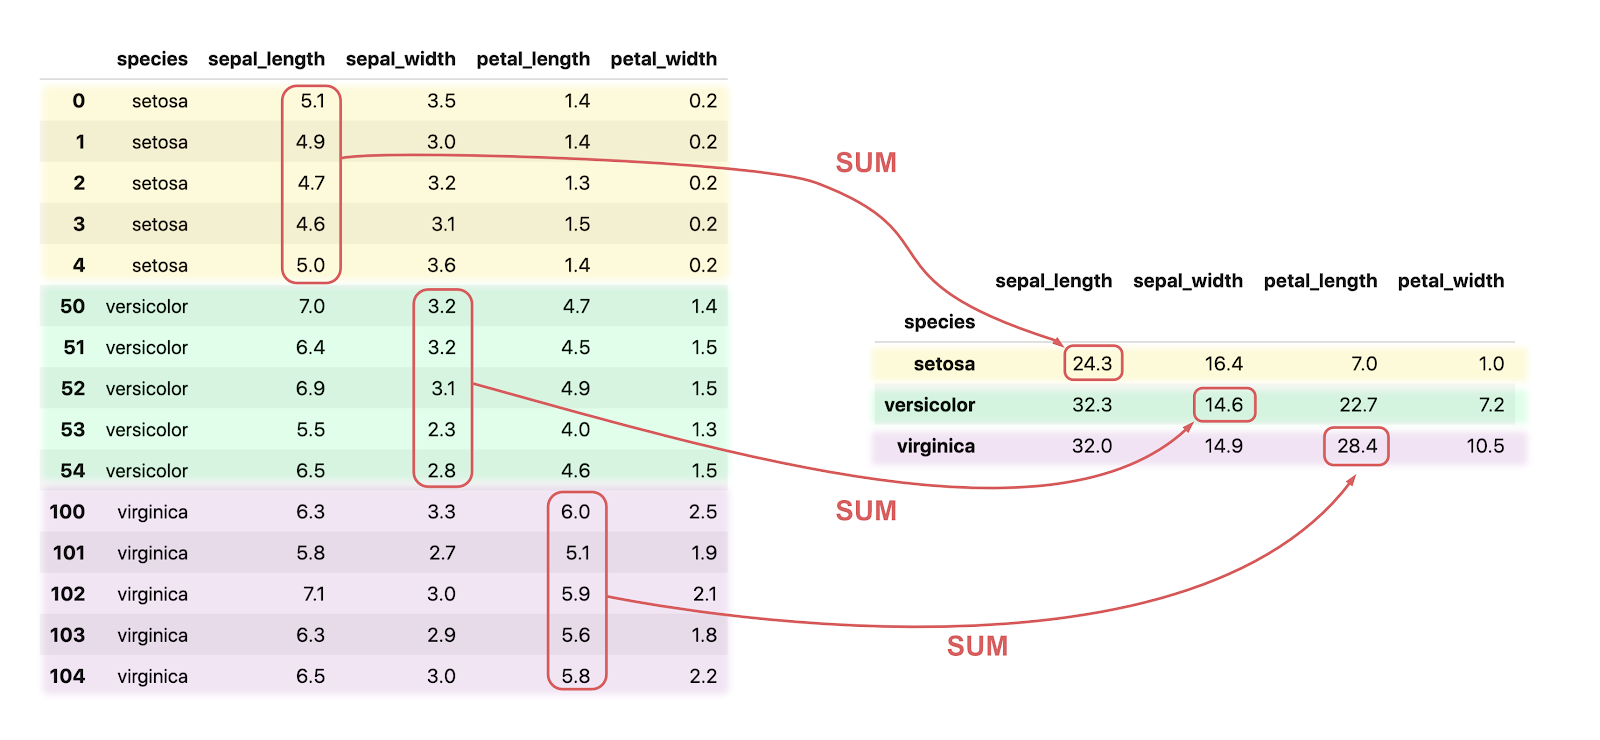
Quelle: https://towardsdatascience.com/how-to-use-the-split-apply-combine-strategy-in-pandas-groupby-29e0eb44b62e

Gruppieren ohne Aggregatsfunktion gibt ein [DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#) zurück und keine DataFrame. Erst nach Aufruf der gewünschten Aggregatsfunktion bekommt man wieder eine DataFrame.

In [ ]:
# Summe aller nummerischen Werte je Kategorie
df.groupby('class').sum()

## DataFrames filtern nach Bedingungen

In [ ]:
# booleanische Serie
df[df['age'] > 50]

## Korrelation zwischen Spalten
Mit der Funktion [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) können Korrelationen zwischen Spalten einfach berechnet werden.

In [ ]:
df.corr()

## Plots
Es ist möglich in *Pandas* direkt zu plotten. Allerdings ist es empfehlenswert dies stattdessen mit [*Seaborn*](https://seaborn.pydata.org/) oder [*Matplotlib*](https://matplotlib.org/) zu machen.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.scatterplot(data=df, x='age', y='fare', hue='class')

# plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# plt.legend(loc='upper right')

plt.show()

## Pivot
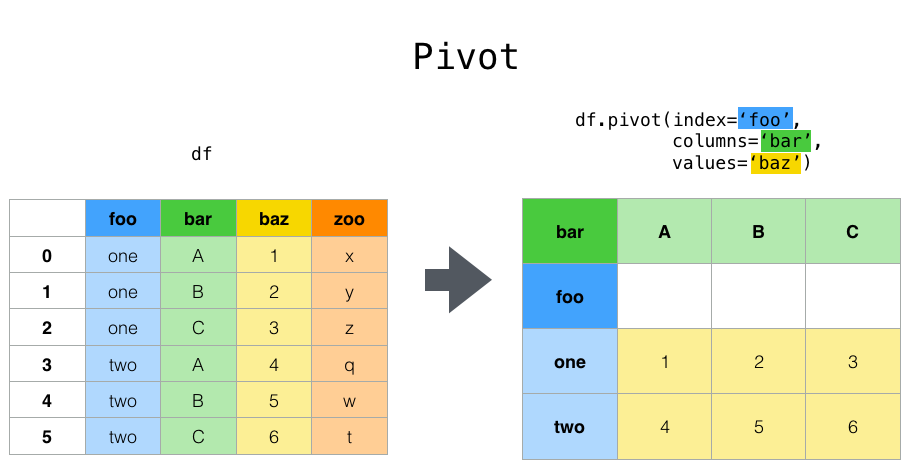
Quelle: https://pandas.pydata.org/docs/user_guide/reshaping.html

<div class="alert alert-info">
<b>Achtung</b> Beispiel nur zur Veranschaulichung! Es ergibt hier in dieser Form nicht so Sinn. 
</div>

In [ ]:
df.pivot_table(index=['class'], columns=['embark_town'], values=['fare'])


## Was tun, wenn die gewünschte Funktion nicht in *Pandas* vorhanden?
Mit der Nutzung von [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) lassen sich Funktionen auf ganze Serien oder DataFrames anwenden. Es können auch eigene Funktionen mit `lambda` angewendet werden.

In [ ]:
# apply... und lambda

![CC-BY-NC](https://scm.cms.hu-berlin.de/ibi/python/-/raw/master/img/cc-by-nc.png)

Dieses Notebook ist als freies Werk unter der Lizenz [Creative Commons Attribution-NonCommercial 3.0 Unported](http://creativecommons.org/licenses/by-nc/3.0/) verfügbar. Sie dürfen die Inhalte kopieren, verteilen und verändern, solange Sie die Urheber nennen und sie nicht für kommerzielle Zwecke nutzen.